A1. Use librosa.effects.trim() to remove the silence parts of speech from beginning and
end of your recorded signal. Listen to the new signal and perceptually compare the audio with
original.

In [30]:
import librosa
import librosa.display
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt

In [18]:
original_audio, sr = librosa.load('somu.wav.mp3', sr=None)
trimmed_audio, index = librosa.effects.trim(original_audio)
sf.write('trimmed_audio.wav', trimmed_audio, sr)
trimmed,sr1 = librosa.load('trimmed_audio.wav',sr = None)

In [19]:
print("Original Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr))

Original Audio:


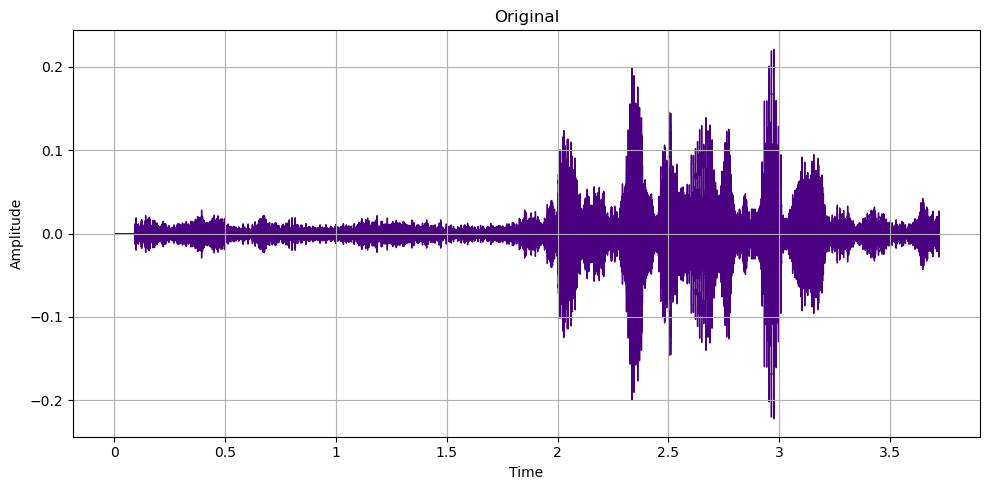

In [23]:
plt.figure(figsize=(10, 5))
librosa.display.waveshow(original_audio, sr=sr,color='indigo')
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
print("Trimmed Audio:")
ipd.display(ipd.Audio(trimmed_audio, rate=sr))

Trimmed Audio:


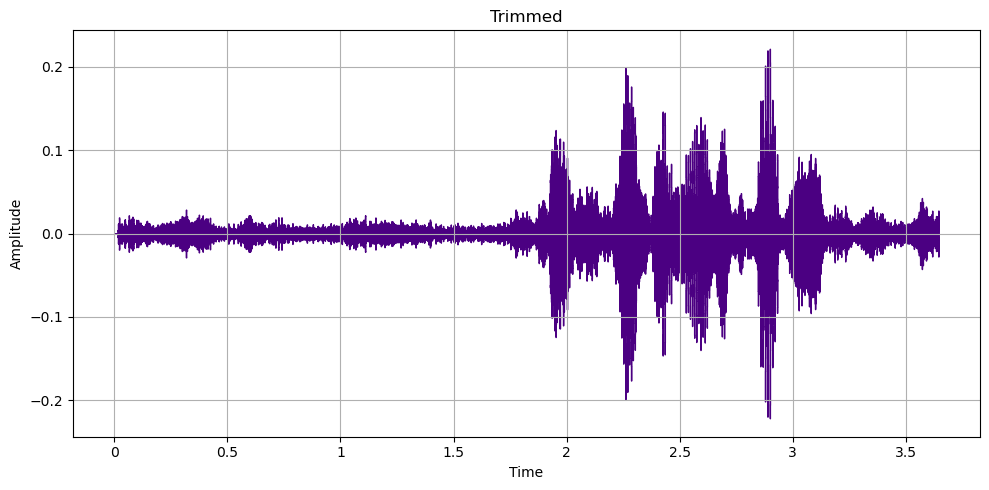

In [24]:
plt.figure(figsize=(10, 5))
librosa.display.waveshow(trimmed, sr=sr1,color='indigo')
plt.title('Trimmed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


Q2. Use librosa.effects.split() to split the recorded speech with detected silences. Play
around with the top_db parameter and see the effects of split. Listen to the generated signals and
observe the split quality

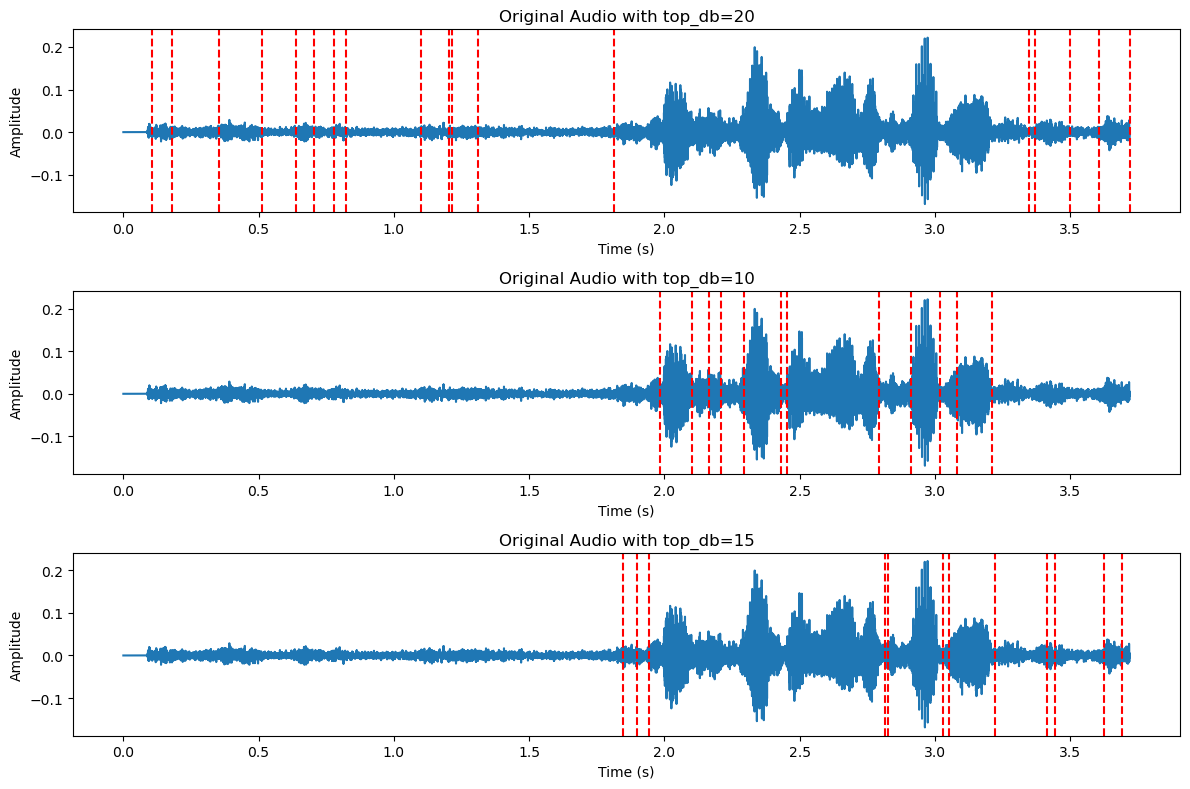

Split Audio with top_db=20:


Split Audio with top_db=10:


Split Audio with top_db=15:


In [41]:
original_audio_file = "somu.wav.mp3"
y, sr = librosa.load(original_audio_file, sr=None)
 
top_db_values = [20, 10, 15] 
 
plt.figure(figsize=(12, 8))
 
for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    plt.subplot(len(top_db_values), 1, i + 1)
    plt.plot(np.arange(len(y)) / sr, y)
    plt.title(f'Original Audio with top_db={top_db}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
 
    for interval in intervals:
        plt.axvline(interval[0] / sr, color='r', linestyle='--')
        plt.axvline(interval[1] / sr, color='r', linestyle='--')
 
plt.tight_layout()
plt.show()
 
for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    split_audio = np.concatenate([y[start:end] for start, end in intervals])
 
    print(f"Split Audio with top_db={top_db}:")
    ipd.display(ipd.Audio(split_audio, rate=sr))